### Data Preprocessing

In [3]:
# Load libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import LabelEncoder, MinMaxScaler

In [4]:
# Load the data

# Define the column names
column_names = ['PelvicIncidence', 'PelvicTilt', 'LumbarLordosisAngle', 'SacralSlope', 
                'PelvicRadius', 'GradeOfSpondylolisthesis', 'Class']

# Load the data from the file
file_path = '/Users/taniadiamanta/UOM/Semester 2/Statistics2/Coursework/Data.txt'
data = pd.read_csv(file_path, delim_whitespace=True, header=None) # load data as a dataframe, treat white space as separator

# Assign column names
data.columns = column_names

# Display the first few rows
print(data.head())
print(data.info())

   PelvicIncidence  PelvicTilt  LumbarLordosisAngle  SacralSlope  \
0            63.03       22.55                39.61        40.48   
1            39.06       10.06                25.02        29.00   
2            68.83       22.22                50.09        46.61   
3            69.30       24.65                44.31        44.64   
4            49.71        9.65                28.32        40.06   

   PelvicRadius  GradeOfSpondylolisthesis Class  
0         98.67                     -0.25    AB  
1        114.41                      4.56    AB  
2        105.99                     -3.53    AB  
3        101.87                     11.21    AB  
4        108.17                      7.92    AB  
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 310 entries, 0 to 309
Data columns (total 7 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   PelvicIncidence           310 non-null    float64
 1   PelvicTilt       

/var/folders/5n/gmdc45hn66ndgk139mj4gpyh0000gn/T/ipykernel_1018/1024748082.py:9: FutureWarning: The 'delim_whitespace' keyword in pd.read_csv is deprecated and will be removed in a future version. Use ``sep='\s+'`` instead
  data = pd.read_csv(file_path, delim_whitespace=True, header=None) # load data as a dataframe, treat white space as separator


In [5]:
# Description of numerical columns
num_columns = data.select_dtypes(include=['number']).columns
print(f"Numerical Columns in store dataset: {num_columns}")
print(data[num_columns].describe())

Numerical Columns in store dataset: Index(['PelvicIncidence', 'PelvicTilt', 'LumbarLordosisAngle', 'SacralSlope',
       'PelvicRadius', 'GradeOfSpondylolisthesis'],
      dtype='object')
       PelvicIncidence  PelvicTilt  LumbarLordosisAngle  SacralSlope  \
count       310.000000  310.000000           310.000000   310.000000   
mean         60.496484   17.542903            51.930710    42.953871   
std          17.236109   10.008140            18.553766    13.422748   
min          26.150000   -6.550000            14.000000    13.370000   
25%          46.432500   10.667500            37.000000    33.347500   
50%          58.690000   16.360000            49.565000    42.405000   
75%          72.880000   22.120000            63.000000    52.692500   
max         129.830000   49.430000           125.740000   121.430000   

       PelvicRadius  GradeOfSpondylolisthesis  
count    310.000000                310.000000  
mean     117.920548                 26.296742  
std       13.317629

In [6]:
# Description of categorical columns
cat_columns = data.select_dtypes(include=['object']).columns
print(f"Categorical Columns in store dataset: {cat_columns}")
print(data[cat_columns].describe())

Categorical Columns in store dataset: Index(['Class'], dtype='object')
       Class
count    310
unique     2
top       AB
freq     210


In [7]:
# Check missing values
missing_values = data.isnull().sum()
print(f"Missing values:\n{missing_values}")

Missing values:
PelvicIncidence             0
PelvicTilt                  0
LumbarLordosisAngle         0
SacralSlope                 0
PelvicRadius                0
GradeOfSpondylolisthesis    0
Class                       0
dtype: int64


In [8]:
# Check duplicates
duplicates = data[data.duplicated()]
print(f"Duplicate rows: {len(duplicates)}")

Duplicate rows: 0


Description of variables:

##### 1. Pelvic incidence (PI)
- Angle used to describe the orientation of the pelvis.
- It influences the shape of the lumbar spine. A normal pelvic incidence allows for proper spinal alignment and balance.
- Typically remains constant throughout a person’s life.
- If PI is too high or too low, it can lead to abnormal spine alignment which can lead to discomfort, imbalance, and even pain. 
- Normal range = 35° - 50°
- A low PI (<35°) while a low PI may cause a flat back (hypolordosis)
- A high PI (>50°) can result in an exaggerated lumbar curve (lordosis)
- PI can't be negative

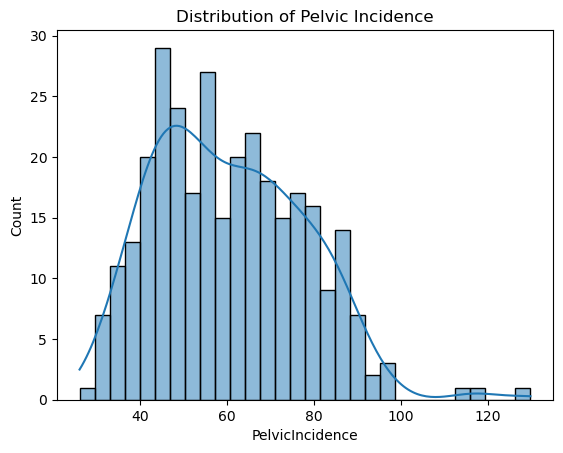

In [10]:
# Distribution of PI
sns.histplot(data['PelvicIncidence'], bins=30, kde=True)
plt.title("Distribution of Pelvic Incidence")
plt.show()

   PelvicIncidence  Log_PelvicIncidence
0            63.03             4.159352
1            39.06             3.690378
2            68.83             4.246064
3            69.30             4.252772
4            49.71             3.926123


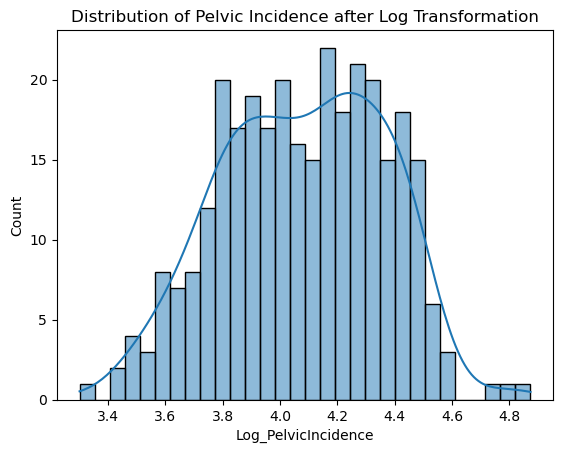

In [11]:
# Apply log transformation to handle skewed distribution 
data['Log_PelvicIncidence'] = np.log1p(data['PelvicIncidence']) # use np.log1p to handle zeros, if any

# Display the transformed data
print(data[['PelvicIncidence', 'Log_PelvicIncidence']].head())

# Distribution of log PI
sns.histplot(data['Log_PelvicIncidence'], bins=30, kde=True)
plt.title("Distribution of Pelvic Incidence after Log Transformation")
plt.show()

##### 2. Pelvic tilt (PT)
- This angle is formed between the line of the pelvic incidence and the horizontal plane.
- It reflects the amount of pelvic rotation and can be associated with postural changes.
- PT helps maintain proper spinal posture and alignment by balancing the spine over the pelvis. It compensates for changes in the lumbar spine curvature.
- Normal range = 5° - 15°
- A low PT (<5°) means posterior pelvic tilt, may result in a flatback posture, where the lower back loses its natural curve, which can cause instability and discomfort.
- A high PT (>15°) can result in an exaggerated lumbar curve (lordosis)
- PT can be negative

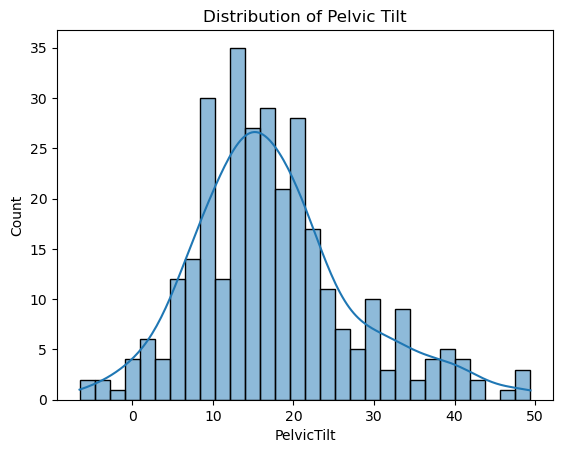

In [13]:
# Distribution of PT
sns.histplot(data['PelvicTilt'], bins=30, kde=True)
plt.title("Distribution of Pelvic Tilt")
plt.show()

##### 3. Lumbar lordosis angle (LL)
- The natural inward curvature of the lower back.
- It is important for the distribution of weight and shock absorption in the spine.
- Normal range = 30° - 50°
- A low LL (<30°) leads to a loss of the natural curve (hypolordosis/flatback syndrome), which may cause spinal instability, muscle fatigue, and discomfort.
- A high LL (>50°) lead to excessive curvature (lordosis), which can stress the lower back muscles and ligaments, causing pain and potential disc herniations.
- LL can be negative.

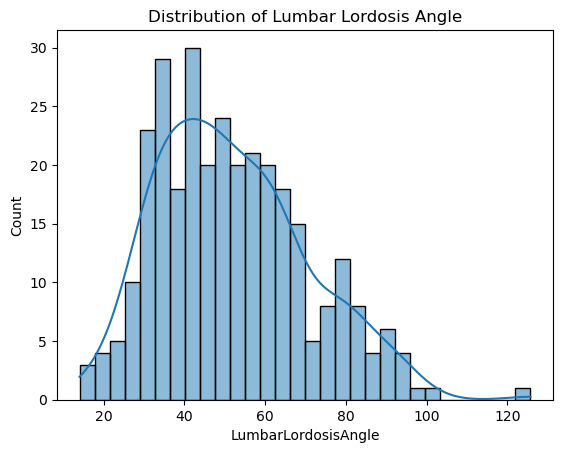

In [16]:
# Distribution of LL
sns.histplot(data['LumbarLordosisAngle'], bins=30, kde=True)
plt.title("Distribution of Lumbar Lordosis Angle")
plt.show()

   LumbarLordosisAngle  Log_LumbarLordosis
0                39.61            3.704014
1                25.02            3.258865
2                50.09            3.933589
3                44.31            3.813528
4                28.32            3.378270


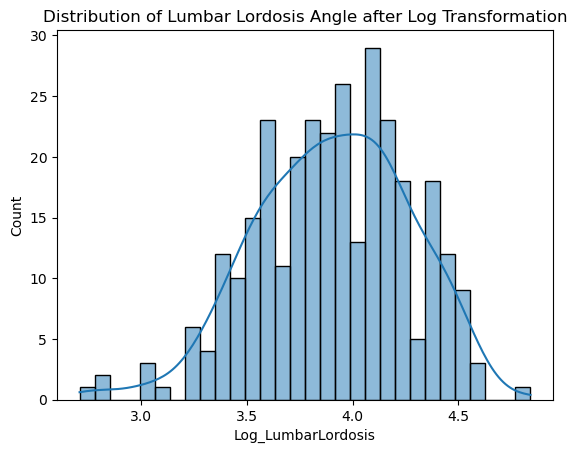

In [22]:
# Apply log transformation to handle skewed distribution 
data['Log_LumbarLordosis'] = np.log1p(data['LumbarLordosisAngle']) # use np.log1p to handle zeros, if any

# Display the transformed data
print(data[['LumbarLordosisAngle', 'Log_LumbarLordosis']].head())

# Distribution of log PI
sns.histplot(data['Log_LumbarLordosis'], bins=30, kde=True)
plt.title("Distribution of Lumbar Lordosis Angle after Log Transformation")
plt.show()

##### 4. Sacral slope (SS)
- The angle between the sacral plateau (the base of the sacrum) and the horizontal plane.
- It helps indicate the position of the sacrum relative to the pelvis.
- Normal range = 30° - 40°
- A low SS (<30°) could suggest a flat pelvis, which may lead to a reduced lumbar lordosis (hypolordosis) and postural issues.
- A high SS (>40°) may result in exaggerated lumbar lordosis, contributing to conditions like hyperlordosis or swayback.
- SS can't be negative

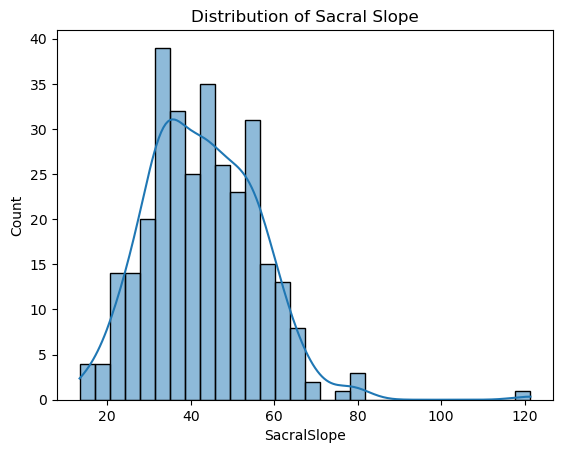

In [25]:
# Distribution of SS
sns.histplot(data['SacralSlope'], bins=30, kde=True)
plt.title("Distribution of Sacral Slope")
plt.show()

   SacralSlope  Log_SacralSlope
0        40.48         3.725211
1        29.00         3.401197
2        46.61         3.863043
3        44.64         3.820785
4        40.06         3.715034


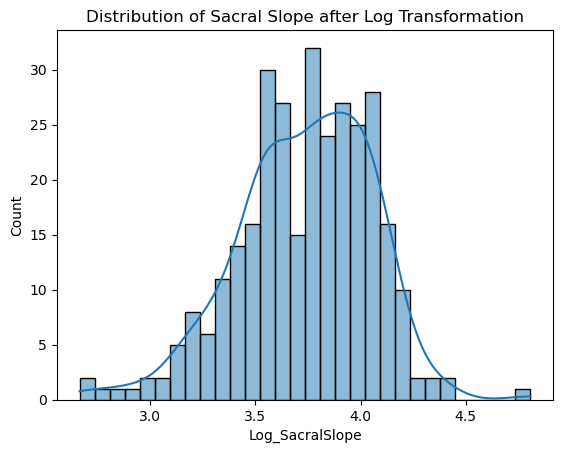

In [26]:
# Apply log transformation to handle skewed distribution 
data['Log_SacralSlope'] = np.log1p(data['SacralSlope']) # use np.log1p to handle zeros, if any

# Display the transformed data
print(data[['SacralSlope', 'Log_SacralSlope']].head())

# Distribution of log PI
sns.histplot(data['Log_SacralSlope'], bins=30, kde=True)
plt.title("Distribution of Sacral Slope after Log Transformation")
plt.show()

##### 5. Pelvic radius (PR)
- The size and shape of the pelvis
- A normal pelvic radius ensures that the pelvis and lumbar spine function together efficiently during activities like walking or running.
- Normal range = 100mm - 130mm
- A low PR (<100mm) may cause a reduced lumbar curve, potentially causing postural issues, increased stress on the lower back, and discomfort.
- A high PR (>130mm) may change the angle of pelvic tilt. It may also affect the body's center of gravity and contribute to abnormal posture or gait.
- PR can't be negative

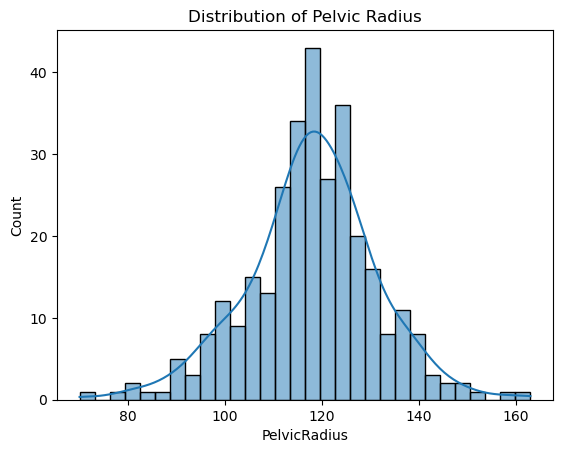

In [29]:
# Distribution of PR
sns.histplot(data['PelvicRadius'], bins=30, kde=True)
plt.title("Distribution of Pelvic Radius")
plt.show()

##### 6. Grade of Spondylolisthesis (GS)
- How much one vertebra slips out of position over the vertebra below it. The grade of spondylolisthesis indicates the severity of this slippage.
- A normal spine should have no vertebral slippage (0).
- Grade 1 (0-25% slippage): mild spondylolisthesis, may cause little or no symptoms so only treated conservatively
- Grade 2 (25-50% slippage): moderate spondylolisthesis, may cause more significant symptoms, and treatment may include physical therapy or, in some cases, surgical intervention.
- Grade 3 (50-75% slippage): severe spondylolisthesis. Patients typically experience more pain and dysfunction, often requiring surgical treatment.
- Grade 4 (75-100% slippage): very severe spondylolisthesis. It is usually associated with significant spinal instability and often requires surgical intervention to correct the misalignment.
- Grade 5 (>100% slippage): also called Spondyloptosis. A complete dislocation of the vertebra. This is a rare and extreme form of spondylolisthesis and typically requires urgent surgical correction.
- GS can't be negative

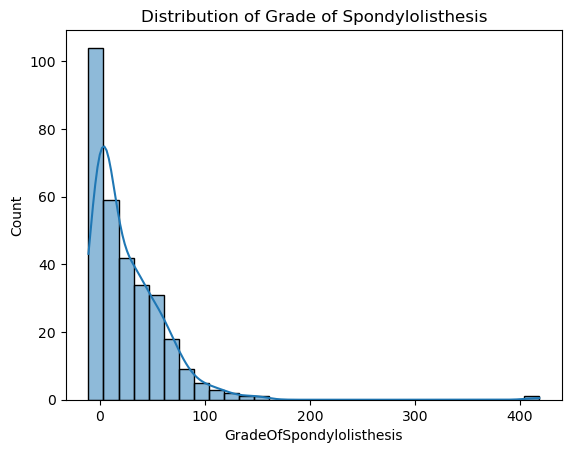

In [32]:
# Distribution of GS
sns.histplot(data['GradeOfSpondylolisthesis'], bins=30, kde=True)
plt.title("Distribution of Grade of Spondylolisthesis")
plt.show()

In [34]:
# Count negative values
negative_values_count = (data['GradeOfSpondylolisthesis'] < 0).sum()
print ("Number of negative values in GS =", negative_values_count)

Number of negative values in GS = 58


In [35]:
# Impute negative values (since GS can't be negative, also to avoid NaN values in log transformation) with median (bcs skewed distribution)
median_value = data['GradeOfSpondylolisthesis'].median()
data.loc[data['GradeOfSpondylolisthesis'] < 0, 'GradeOfSpondylolisthesis'] = median_value

# Check negative values after fix
negative_values_count = (data['GradeOfSpondylolisthesis'] < 0).sum()
print ("Number of negative values in GS =", negative_values_count)

Number of negative values in GS = 0


   GradeOfSpondylolisthesis  Log_GradeOfSpondylolisthesis
0                    11.765                      2.546707
1                     4.560                      1.715598
2                    11.765                      2.546707
3                    11.210                      2.502255
4                     7.920                      2.188296


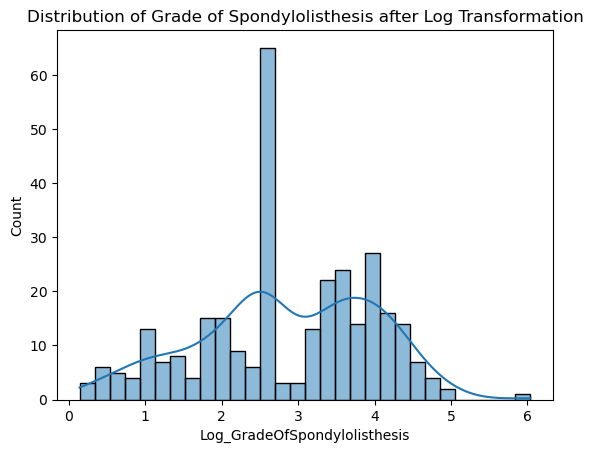

In [36]:
# Apply log transformation to handle skewed distribution 
data['Log_GradeOfSpondylolisthesis'] = np.log1p(data['GradeOfSpondylolisthesis']) # use np.log1p to handle zeros, if any

# Display the transformed data
print(data[['GradeOfSpondylolisthesis', 'Log_GradeOfSpondylolisthesis']].head())

# Distribution of log PI
sns.histplot(data['Log_GradeOfSpondylolisthesis'], bins=30, kde=True)
plt.title("Distribution of Grade of Spondylolisthesis after Log Transformation")
plt.show()

In [37]:
# Bin Log_GradeofSpondylolisthesis to grade 1-5

# Bin the data into 5 equal-sized bins based on percentiles
data['GS_Binned'] = pd.qcut(data['Log_GradeOfSpondylolisthesis'], q=5, labels=[1, 2, 3, 4, 5])

# View the first few rows to see the binned results
print(data[['Log_GradeOfSpondylolisthesis', 'GS_Binned']].head())

   Log_GradeOfSpondylolisthesis GS_Binned
0                      2.546707         2
1                      1.715598         1
2                      2.546707         2
3                      2.502255         2
4                      2.188296         2


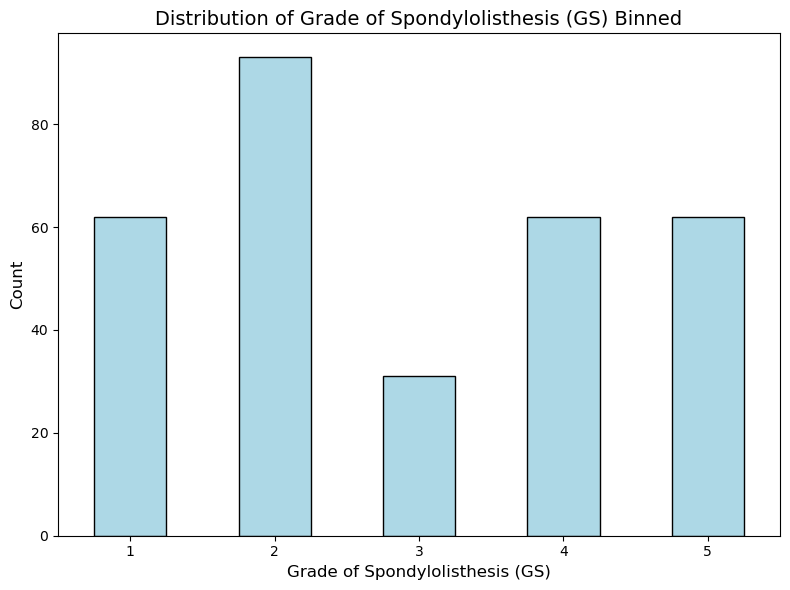

In [39]:
# Count the number of data points in each bin
bin_counts = data['GS_Binned'].value_counts().sort_index()

# Plot the count of data points in each bin with the specified order
plt.figure(figsize=(8, 6))
bin_counts.plot(kind='bar', color='lightblue', edgecolor='black')

# Adding labels and title
plt.title('Distribution of Grade of Spondylolisthesis (GS) Binned', fontsize=14)
plt.xlabel('Grade of Spondylolisthesis (GS)', fontsize=12)
plt.ylabel('Count', fontsize=12)
plt.xticks(ticks=range(5), labels=[1, 2, 3, 4, 5], rotation=0)
plt.tight_layout()

In [40]:
# Encode with LabelEncoder bcs GS is ordinal
label_encoder = LabelEncoder()

# Perform label encoding and store the result in a new column
data['GS_Binned'] = label_encoder.fit_transform(data['GS_Binned'])

# Shift the encoded values by 1 (to start from 1 instead of 0)
data['GS_Binned'] = data['GS_Binned'] + 1

# Print the updated mapping
label_mapping = {i + 1: label for i, label in enumerate(label_encoder.classes_)}
print(label_mapping)

{1: 1, 2: 2, 3: 3, 4: 4, 5: 5}


In [42]:
# Encode with LabelEncoder bcs GS is ordinal
label_encoder = LabelEncoder()

# Perform the label encoding
data['GS_Binned'] = label_encoder.fit_transform(data['GS_Binned'])

# Shift the encoded values by 1 (to start from 1 instead of 0)
data['GS_Binned'] = data['GS_Binned'] + 1

# Print the updated mapping
label_mapping = {i + 1: label for i, label in enumerate(label_encoder.classes_)}
print(label_mapping)

{1: 1, 2: 2, 3: 3, 4: 4, 5: 5}


##### 7. Class
- Class labels: Normal (NO) and Abnormal (AB).

In [45]:
# Count number of occurrences of normal vs abnormal
class_counts = data['Class'].value_counts()
print(class_counts)

Class
AB    210
NO    100
Name: count, dtype: int64


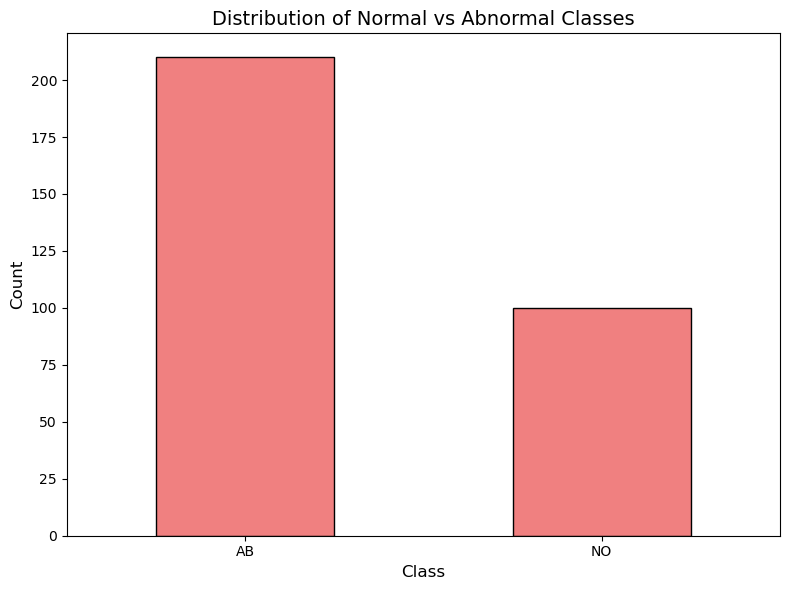

In [46]:
# Count class
class_counts = data['Class'].value_counts()

# Plot the count of normal vs abnormal
plt.figure(figsize=(8, 6))
class_counts.plot(kind='bar', color='lightcoral', edgecolor='black')

# Add labels and title
plt.title('Distribution of Normal vs Abnormal Classes', fontsize=14)
plt.xlabel('Class', fontsize=12)
plt.ylabel('Count', fontsize=12)
plt.xticks(rotation=0)
plt.tight_layout()

# Show plot
plt.show()

In [47]:
# Encode using one-hot encoding since class is not ordinal
class_encoded = pd.get_dummies(data['Class'], prefix='Class', drop_first=False) # Don't drop 'Class'

# Concatenate the original data with the one-hot encoded 'Class' columns
data = pd.concat([data, class_encoded], axis=1)

In [49]:
# Re-check all variables
data.info()
data.head()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 310 entries, 0 to 309
Data columns (total 14 columns):
 #   Column                        Non-Null Count  Dtype  
---  ------                        --------------  -----  
 0   PelvicIncidence               310 non-null    float64
 1   PelvicTilt                    310 non-null    float64
 2   LumbarLordosisAngle           310 non-null    float64
 3   SacralSlope                   310 non-null    float64
 4   PelvicRadius                  310 non-null    float64
 5   GradeOfSpondylolisthesis      310 non-null    float64
 6   Class                         310 non-null    object 
 7   Log_PelvicIncidence           310 non-null    float64
 8   Log_LumbarLordosis            310 non-null    float64
 9   Log_SacralSlope               310 non-null    float64
 10  Log_GradeOfSpondylolisthesis  310 non-null    float64
 11  GS_Binned                     310 non-null    int64  
 12  Class_AB                      310 non-null    bool   
 13  Class

,PelvicIncidence,PelvicTilt,LumbarLordosisAngle,SacralSlope,PelvicRadius,GradeOfSpondylolisthesis,Class,Log_PelvicIncidence,Log_LumbarLordosis,Log_SacralSlope,Log_GradeOfSpondylolisthesis,GS_Binned,Class_AB,Class_NO
0,63.03,22.55,39.61,40.48,98.67,11.765,AB,4.159352,3.704014,3.725211,2.546707,2,True,False
1,39.06,10.06,25.02,29.00,114.41,4.560,AB,3.690378,3.258865,3.401197,1.715598,1,True,False
2,68.83,22.22,50.09,46.61,105.99,11.765,AB,4.246064,3.933589,3.863043,2.546707,2,True,False
3,69.30,24.65,44.31,44.64,101.87,11.210,AB,4.252772,3.813528,3.820785,2.502255,2,True,False
4,49.71,9.65,28.32,40.06,108.17,7.920,AB,3.926123,3.378270,3.715034,2.188296,2,True,False


##### Standardisation

In [53]:
# Extract the numerical data from data
numerical_columns = ['Log_PelvicIncidence', 'PelvicTilt', 'Log_LumbarLordosis', 'Log_SacralSlope', 'PelvicRadius']
data_numerical = data[numerical_columns]

# Standardization using MinMax (because Z-score resulted in negative values for variables that can't be negative)
scaler = MinMaxScaler(feature_range=(0, 1))  # Scales data between 0 and 1
scaler_fitted = scaler.fit(data_numerical)
data_scaled = scaler_fitted.transform(data_numerical)

# Convert the scaled data back to a DataFrame
data_scaled_df = pd.DataFrame(data_scaled, columns=numerical_columns)

# Replace the original columns with the scaled values
data[numerical_columns] = data_scaled_df

# Recheck summary statistics after standardisation
print(f"Numerical Columns in dataset: {numerical_columns}")
print(data[numerical_columns].describe().round(2))

Numerical Columns in dataset: ['Log_PelvicIncidence', 'PelvicTilt', 'Log_LumbarLordosis', 'Log_SacralSlope', 'PelvicRadius']
       Log_PelvicIncidence  PelvicTilt  Log_LumbarLordosis  Log_SacralSlope  \
count               310.00      310.00              310.00           310.00   
mean                  0.49        0.43                0.56             0.50   
std                   0.18        0.18                0.17             0.15   
min                   0.00        0.00                0.00             0.00   
25%                   0.35        0.31                0.44             0.41   
50%                   0.50        0.41                0.57             0.52   
75%                   0.64        0.51                0.68             0.62   
max                   1.00        1.00                1.00             1.00   

       PelvicRadius  
count        310.00  
mean           0.51  
std            0.14  
min            0.00  
25%            0.44  
50%            0.52  
75%      

In [55]:
data.head()

,PelvicIncidence,PelvicTilt,LumbarLordosisAngle,SacralSlope,PelvicRadius,GradeOfSpondylolisthesis,Class,Log_PelvicIncidence,Log_LumbarLordosis,Log_SacralSlope,Log_GradeOfSpondylolisthesis,GS_Binned,Class_AB,Class_NO
0,63.03,0.519829,39.61,40.48,0.307452,11.765,AB,0.545604,0.466693,0.494805,2.546707,2,True,False
1,39.06,0.296713,25.02,29.00,0.476718,4.560,AB,0.247374,0.258103,0.343566,1.715598,1,True,False
2,68.83,0.513934,50.09,46.61,0.386171,11.765,AB,0.600746,0.574268,0.559140,2.546707,2,True,False
3,69.30,0.557342,44.31,44.64,0.341865,11.210,AB,0.605012,0.518009,0.539415,2.502255,2,True,False
4,49.71,0.289389,28.32,40.06,0.409614,7.920,AB,0.397289,0.314054,0.490055,2.188296,2,True,False


For further analysis, we will mainly be using the following standardised and encoded variables:

Numerical:
- Log_PelvicIncidence
- PelvicTilt
- Log_LumbarLordosis
- Log_SacralSlope
- PelvicRadius

Categorical:
- GS_Binned
- Class_AB
- Class_NO

### Exploratory Data Analysis

##### 1. Does higher grade of spondylolisthesis always guarantee an abnormal spine?

In [65]:
# Create a cross-tabulation of GS_Binned vs Class showing count values
cross_tab = pd.crosstab(data['GS_Binned'], data['Class'])
print(cross_tab)

Class      AB  NO
GS_Binned        
1          22  40
2          39  54
3          26   5
4          61   1
5          62   0


- Higher grade of spondylolisthesis (grade 3, 4, & 5) generally leads to abnormal spine.
- However this is not always the case
- Some observation with grade 1 & 2 were categorised as abnormal too. There must be other variables other than grade of spondylolisthesis that cause spine to be abnormal.

2. What is the relationship between PI, PT, LL, SS, PR, and GS?

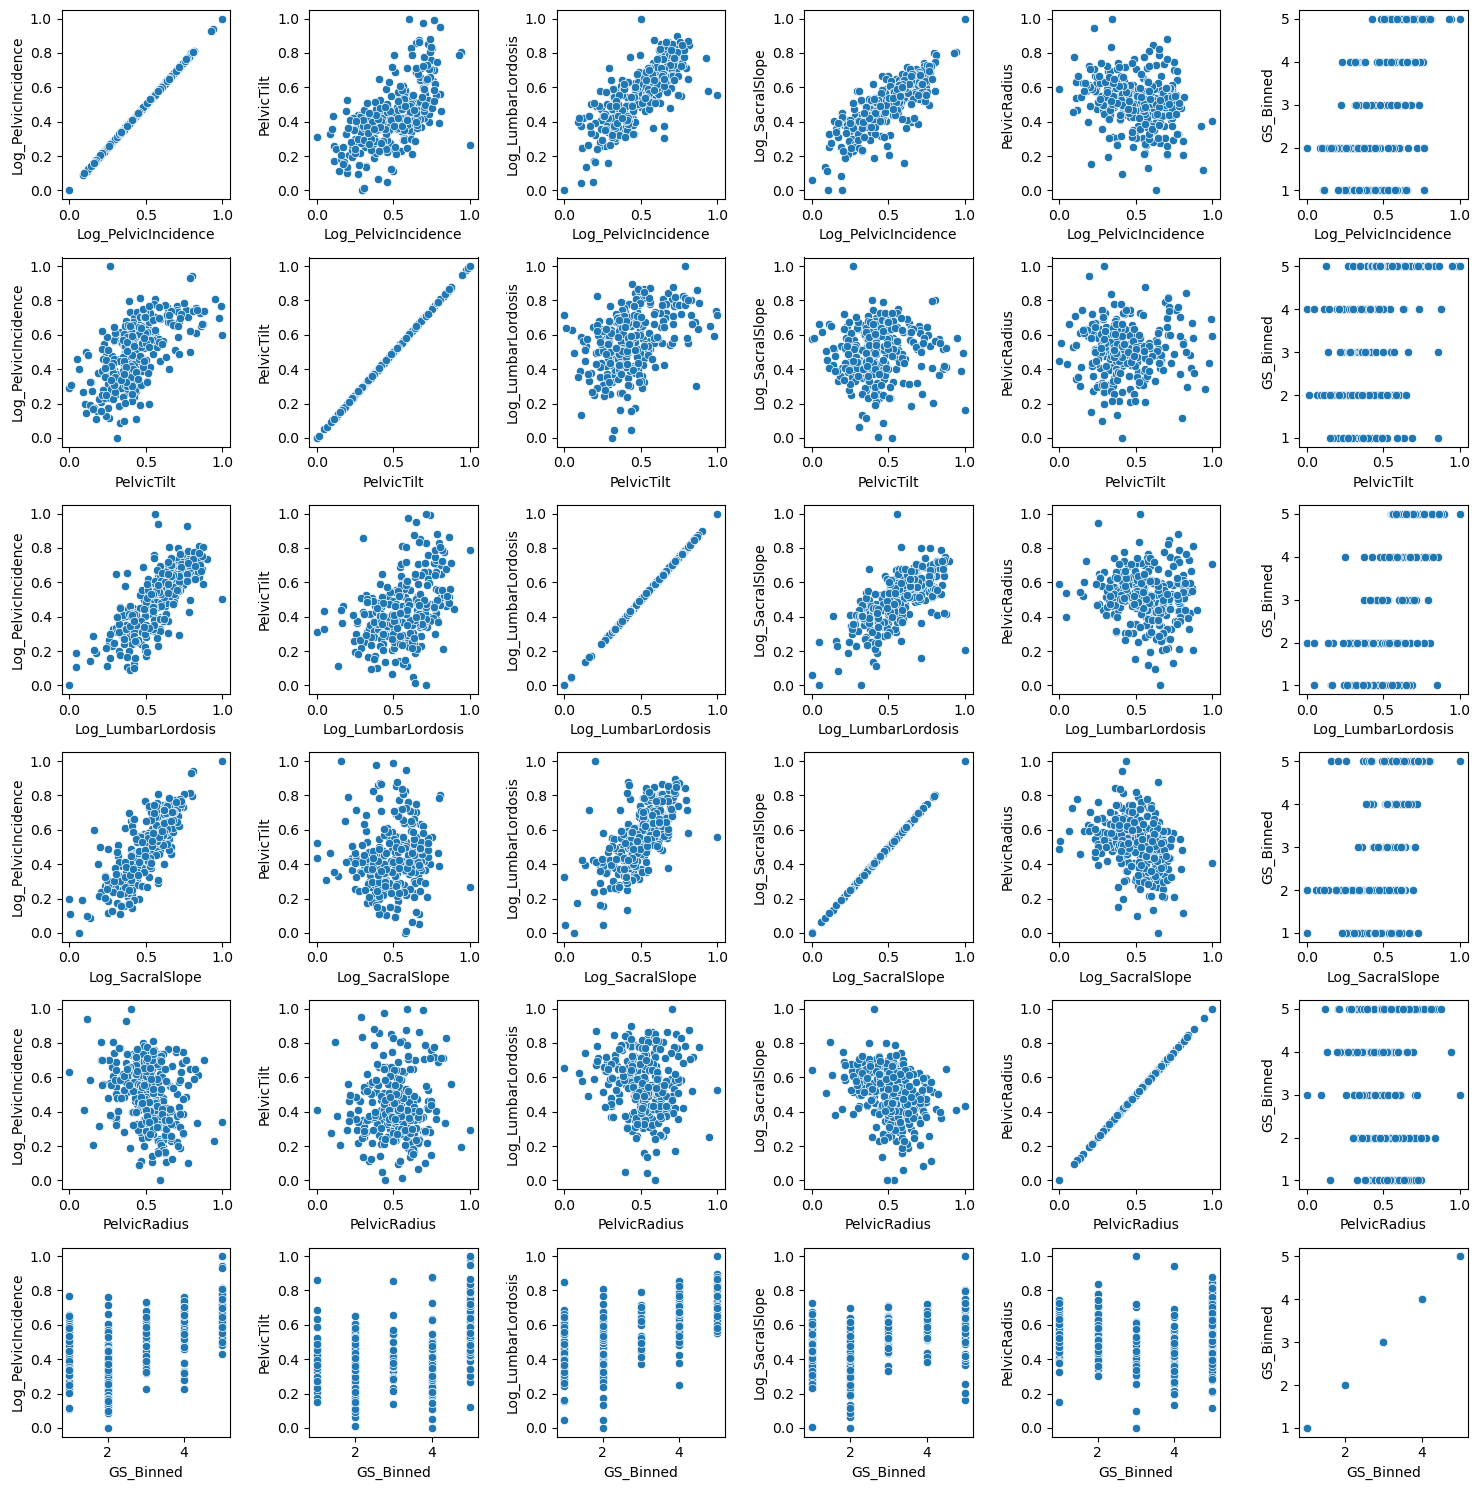

In [73]:
# List of numerical variables
numerical_columns = ['Log_PelvicIncidence', 'PelvicTilt', 'Log_LumbarLordosis', 'Log_SacralSlope', 'PelvicRadius', 'GS_Binned']

# Create a scatter plot for each pair of numerical variables
fig, axes = plt.subplots(len(numerical_columns), len(numerical_columns), figsize=(15, 15))

# Plot scatter plots in a grid
for i in range(len(numerical_columns)):
    for j in range(len(numerical_columns)):
        ax = axes[i, j]
        sns.scatterplot(data=data, x=numerical_columns[i], y=numerical_columns[j], ax=ax)

        # Set axis labels
        ax.set_xlabel(numerical_columns[i])
        ax.set_ylabel(numerical_columns[j])

# Adjust layout to avoid overlap
plt.tight_layout()
plt.show()

1st row
- PI seems to be the main driver of PT, LL, and SS as shown by the positive strong correlations.
- PI has no correlation with PR
- PI has weak positive correlation with GS

2nd row
- PT has a moderate positive correlation with LL (not as strong as the correlation between PI and LL). Each can be the driver of the other one.
- PT doesn't seem to be correlated with SS, indicating that they are both independent towards each other despite being strongly influenced by PI.
- PT is also not correlated to PR

3rd row
- LL is positively influenced by PI (strong), SS (strong), PT (moderate).
- No correlation with PR
- Moderate positive correlation with GS

4th row
- SS has positive strong correlation with PI and LL
- No correlation with PT and PR
- Weak positive correlation with GS

5th row
- PR doesn't seem to be correlated with any of the variables, except for GS (weak negative correlation)

6th row
- GS has a moderate postive correlation with PI and LL

In addition, the relationship is non-linear

##### 3. How does PI, PT, LL, SS, PR, and GS contribute to abnormality in spine?

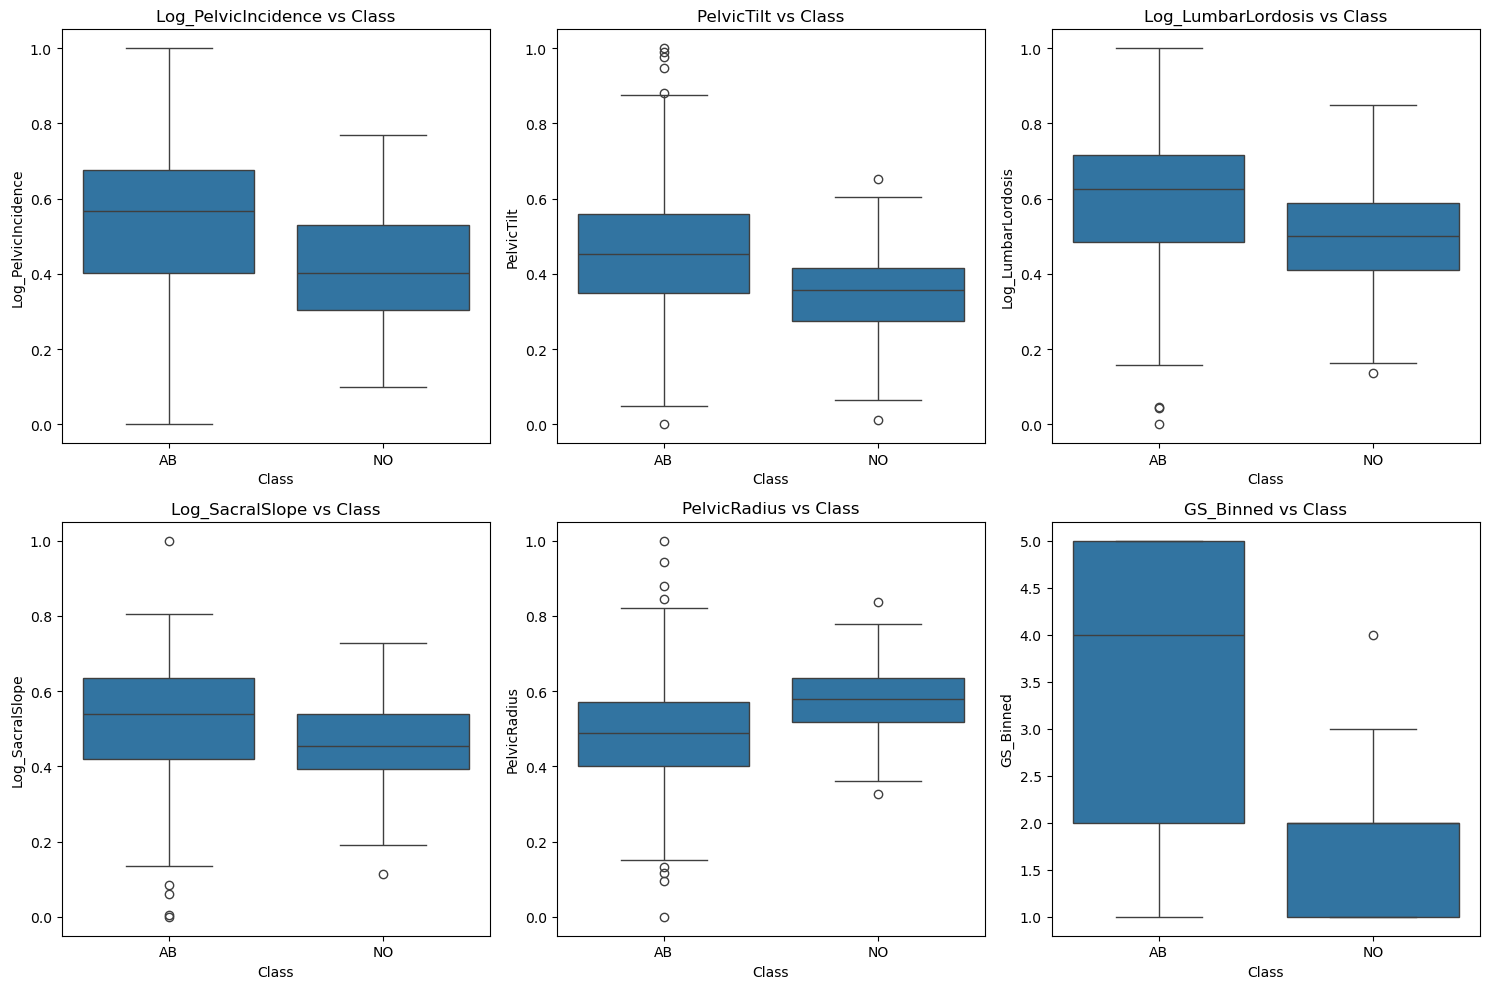

In [77]:
# List of variables to visualize
variables = ['Log_PelvicIncidence', 'PelvicTilt', 'Log_LumbarLordosis', 'Log_SacralSlope', 'PelvicRadius', 'GS_Binned']

# Set up the plotting canvas
plt.figure(figsize=(15, 10))

# Create a box plot for each variable
for i, var in enumerate(variables):
    plt.subplot(2, 3, i + 1)  # 2 rows, 3 columns, position i+1
    sns.boxplot(x='Class', y=var, data=data)
    plt.title(f'{var} vs Class')

plt.tight_layout()
plt.show()

- Variables such as PI, PT, LL, SS, and GS tend to have higher values in the 'AB' class, suggesting that increased severity in these measures correlates with the abnormal class.

##### 4. Correlation Matrix

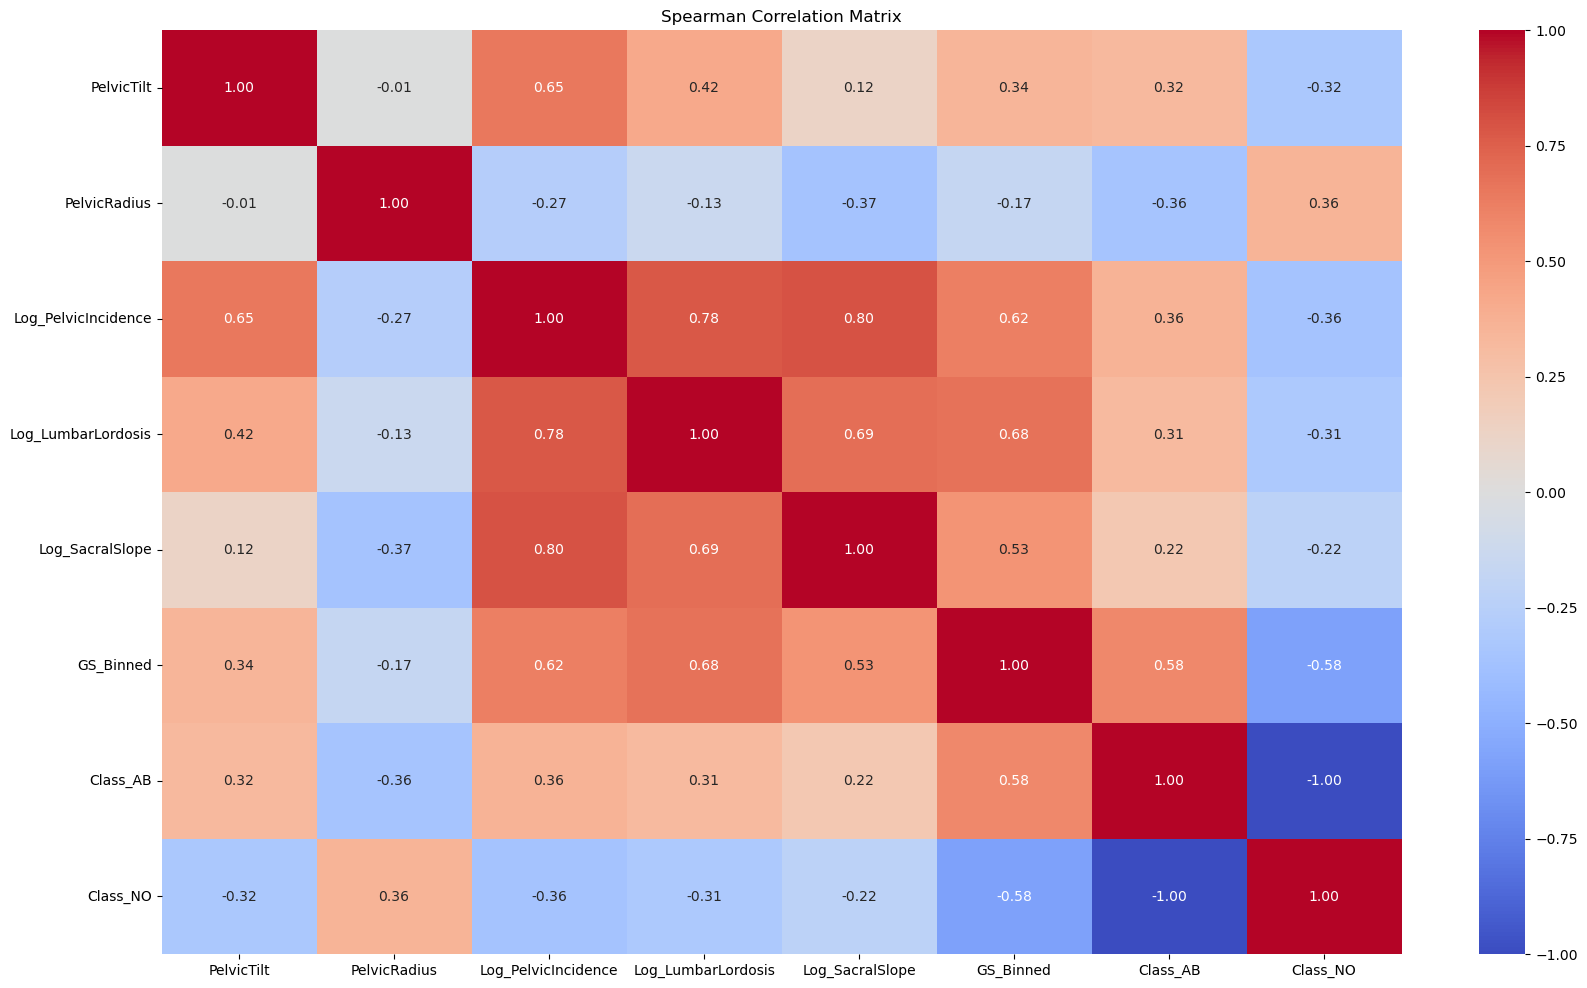

In [80]:
# List of columns to exclude
excluded_columns = ['PelvicIncidence', 'LumbarLordosisAngle', 'SacralSlope', 'GradeOfSpondylolisthesis', 'Log_GradeOfSpondylolisthesis', 'Class']

# Select only the columns that are not in the excluded list
filtered_data = data.drop(columns=excluded_columns)

# Compute correlation matrix on the filtered data
correlation_matrix = filtered_data.corr(method='spearman') # due to non-linear relationship between the variables

# Visualize correlation heatmap
plt.figure(figsize=(20, 12))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt='.2f')
plt.title('Spearman Correlation Matrix')
plt.show()

Correlation with target variable 'Class_AB' and 'Class_NO'
- GS has the highest correlation with abnormality in spine (0.58). Higher GS tends to result in abnormal spine.
- Spine abnormality is also moderately correlated with higher PT (0.32), higher PI (0.36), higher LL (0.31), but lower PR (-0.36)

Correlation of other variables with 'GS'
- GS has strong-positive relationship with LL (0.68), PI (0.62), SS (0.53), moderate-positive relationship with PT (0.34)

Multicollinearity
- PI has a strong positive correlation with LL (0.78), and SS (0.80) which indicates multicollinearity.
- PI has a quite strong positive correlation with PT (0.65), same as LL with SS (0.69). These might also indicate multicollinearity but not as strong
- In further analysis, PCA is recommended to strengthen the independence of each variable

In [82]:
# Download preprocessed data as csv
data.to_csv('data_preprocessed.csv', index=False)